### Saumya Gupta
### Data Science & Business Analytics intern at GRIP, The Sparks Foundation

# Task - 2 Prediction using Unsupervised ML


**From the given 'Iris Dataset' , predict the optimal number of clusters and represent it visually.**

Link for the dataset: https://bit.ly/3kXTdox

## Importing the necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

## Reading the dataset

In [23]:
data = pd.read_csv("/Users/saumyagupta/Downloads/Iris.csv")

In [24]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [26]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Preparing the data

In [43]:
X = data.drop(["Species", "Id"], axis = 1)
X = np.array(X)

In [44]:
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Elbow Method

### Plotting the results onto a line graph, allowing us to observe 'The elbow'

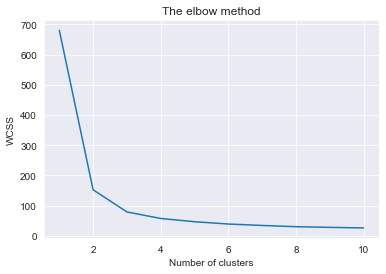

In [45]:
sns.lineplot(range(1, 11), wcss)
sns.set_style("darkgrid")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## Applying K Means to the dataset

### Applying kmeans to the dataset / Creating the kmeans classifier

In [46]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

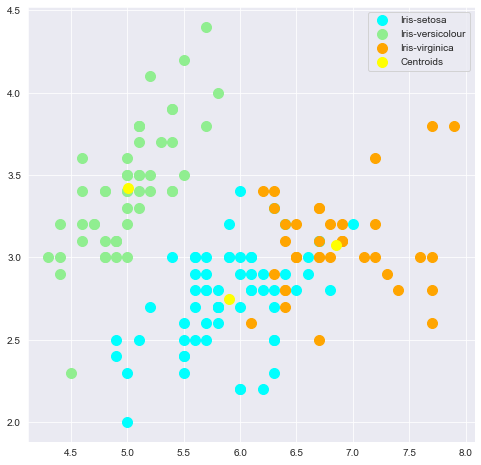

In [52]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightgreen', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Conclusion

The clusters in the Iris Dataset were predicted successfully.

## Thank You!